# Домашнее задание 1 (NumPy, Pandas, Matplotlib)

## Общая информация
**Дата выдачи**: 31.01.2018

**Срок сдачи**: 23:59 13.02.2018

**О задании**

Домашнее задание №1 ориентировано на более тесное знакомство с модулями NumPy, Pandas и Matplotlib путём решения набора задач. Целью задания является редактирование данного ipython notebook'a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

**Оценивание и штрафы**

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи), оценка за задание выставляется следующим образом:
Оценка за задание = Сумма баллов за решенные задачи/3

Таким образом, максимально допустимая оценка за задание — 10 баллов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.2 балла в день, но получить отрицательное число баллов нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется **САМОСТОЯТЕЛЬНО**. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

**Формат сдачи**

Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: HW1_Username.ipynb, где Username — Ваша фамилия на латинице. Далее отправьте этот файл на почту курса ( hse.minor.dm+<номер группы>@gmail.com, указав в теме письма "[ИАД-1] Задание N, ФИО")



## Инструкция по установке на Windows:

Для установки всех необходимых библиотек на windows рекомендуется поставить дистрибутив Anaconda. Для этого нужно
просто скачать необходимую версия с официального сайта https://www.continuum.io/downloads (мы рекомендуем ставить
python версии 3.x). После установки дистрибутива необходимо запустить командную строку (для этого можно нажать win+R и набрать команду cmd). Затем, для запуска ipython notebook'а достаточно просто написать ipython notebook в
командной строке, и у вашем браузере откроется стандартная страничка, которую вы уже много раз видели, используя
виртуальную машину.

## Инструкция по установке на Linux/Mac OS:

Под Linux и Mac OS также доступен дистрибутив Anaconda, который можно скачать с https://www.continuum.io/downloads.
Дальше опять же вам нужно открыть терминал и набрать там команду ipython notebook (либо возможно ipython3
notebook).

Если же вам по каким-либо причинам не хочется ставить Anaconda (например, вы не хотите, чтобы у вас появлялась еще
одна версия python и были возможные конфликты путей, или вы просто чувствуете в себе Силу и хотите все поставить
сами), то можно установить все необходимые библиотеки напрямую. Для этого выполните в терминале следующие две
команды:

```bash
sudo apt-get install -y build-essential python3-numpy python3-scipy python3-matplotlib ipython3 
ipython3-notebook python3-pandas python3-sympy python3-nose python3-pip swig

sudo pip3 install cython scikit-image scikit-learn jupyter
```
Для Mac OS в первой команде нужно заменить apt-get на brew (если у вас стоит пакетный менеджер homebrew, если нет,
его нужно предварительно установить). Если вы хотите использовать python версии 2.x, то во всех командах выше
необходимо убрать цифру 3. То есть, например, писать не python3-numpy, а python-numpy, или не pip3 install, а pip
install.
    
Также, можно воспользоваться инструкциями, описанными здесь:
http://www.machinelearning.ru/wiki/images/1/10/MMP_Praktikum_317_2014a_Python.pdf

Установка Python и всех необходимых модулей не является обязательной для сдачи данного задания.

In [196]:
# Не забудьте импортировать все необходимые модуля для выполнения заданий
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## NumPy

При решении задач запрещено использовать циклы. Обратите внимание на функции и методы np.max, np.min, np.arange, np.hstack, np.roll, np.random.uniform, np.random.rand, np.newaxis.

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [145]:
def minMaxEqual(a, b):
    res = a[a==b]
    return res.min(), res.max()
minMaxEqual(np.array([4, 2, 6, 3]), np.array([4, 3, 6, -3]))    

(4, 6)

#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [146]:
def second_derivative(v):
    x = np.poly1d(v[::-1])
    y = x.deriv().deriv()
    return y.c[::-1]
       
second_derivative(np.array([3, 0, 7, 1]))   

array([14,  6])

#### 3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [147]:
def constructArray(X, i, j):
    print(X)
    return X[i,j]

#### 4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [148]:
def prevZeroMax(x):
     return x[1:][(x==0)[:-1]].max()
prevZeroMax(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

#### 5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размера 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [187]:
def gen_data(lims, k, b, n, noise_level):
    x = np.random.uniform(lims[0], lims[1],n)
    y = k*x + b + np.random.uniform(-noise_level, noise_level,n)
    return (x,y)

#### 6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([[1],[2],[3]]), b = np.array([[0], [-2], [1]]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])
$x*x.T$ - матричное произведение

In [189]:
def calc_value(x, b, a):
    return (x * x.T + np.identity(x.shape[0])*a + b)

## Pandas


Вам предстоит ответить на ряд вопросов о пассажирах Титаника.

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

Описание датасета: https://www.kaggle.com/c/titanic/data

Обратите внимание на функции и методы pd.read_csv, pd.DataFrame{ .head, .shape, .groupby, .fillna }, pd.Series{ .min, .max, .mean, .shape, .std, .corr }

#### 0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [150]:
df = pd.DataFrame(pd.read_csv('C:/Users/Gena/Desktop/train.csv'))
print('Количество признаков - ', len(df.columns))
print('Количество объектов - ', len(df.index))
df

Количество признаков -  12
Количество объектов -  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

In [ ]:
# Типы признаков - Бинарные, Качественные, Вещественные, Порядковые
# Разделение пассажиров на тех, кто заказал отдельную каюту и на тех, кто не сделал этого(классификация)
# Выявление зависимости цены билета от класса(регрессия)
# Разделение пассажиров на группы для предоставления разных зон корабля(кластеризация)

#### 2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [151]:
firstclass_num = len(df.loc[(df['Pclass'] == 1)])
print(firstclass_num)

216


#### 3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [152]:
print(df.Age.max())
print(df.Age.min())
print(df.Age.mean())

80.0
0.42
29.69911764705882


#### 4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [168]:
df.Fare.std()

49.693428597180905

#### 5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [154]:
df.Fare.corr(df.Age)

0.09606669176903887

#### 6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [184]:
df1 = df[df.Survived == 1].groupby(df.Pclass)['Age'].mean().to_frame(); df1

,Age
Pclass,
1,34.784706
2,26.076207
3,23.232941


#### 7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [174]:
print((df.loc[df.Survived == 1]).shape[0]/(df.index).shape[0])
tmp = (df.loc[df.Survived == 1][df.Sex == "male"]).shape[0]
tmp1 = (df.loc[df.Survived == 1][df.Sex == "female"]).shape[0]
print(tmp/tmp1)

0.3838383838383838
0.4678111587982833


C:\Users\Gena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Gena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

In [193]:
print((df.loc[df.Survived ==1][df.Pclass == 1]).shape[0]/df.loc[df.Pclass == 1].shape[0])
print((df.loc[df.Survived ==1][df.Pclass == 2]).shape[0]/df.loc[df.Pclass == 2].shape[0])
print((df.loc[df.Survived ==1][df.Pclass == 3]).shape[0]/df.loc[df.Pclass == 3].shape[0])
# Предположение верно, так как доля доля выживших пассажиров первого класса больше, чем второго и третьего

0.6296296296296297
0.47282608695652173
0.24236252545824846


C:\Users\Gena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Gena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Gena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [185]:
avgAge = df.Age.mean()
res = round(avgAge,1)
df.Age = df.Age.replace(np.nan, res)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Matplotlib

Обратите внимание, что за отсутствие названий графиков и подписей к осям могут снижаться баллы! Вообще, все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

Обратите внимание на функции и методы plt.plot, plt.scatter, plt.legend, plt.title, plt.xlabel, plt.ylabel, plt.fill_between

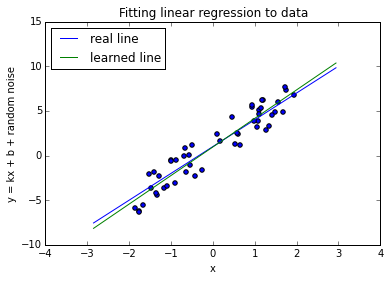

In [4]:
# В итоге ваш график должен получиться примерно таким:

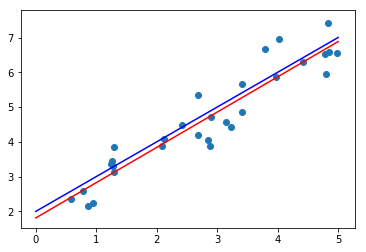

In [269]:
def gen_data(lims, k, b, n, noise_level):
    x = np.random.uniform(lims[0], lims[1],n)
    y = k*x + b + np.random.uniform(-noise_level, noise_level,n)
    return (x,y)

def MyFunc(lims, k, b, n, noise_level):
    from sklearn.linear_model import LinearRegression as LR
    data_x, data_y = gen_data(lims, k, b, n, noise_level)
    regr = LR()
    regr.fit(data_x.reshape(-1,1), data_y.reshape(-1,1))
    k_learned, b_learned = regr.coef_, regr.intercept_
    
    y_learned = k_learned * data_x + b_learned
    tmp = np.linspace(lims[0], lims[1])
    Newtmp = k * tmp + b
    plt.plot(tmp, Newtmp, color = 'blue')
    plt.scatter(data_x, data_y)
    plt.plot(tmp, k_learned[0] * tmp + b_learned, color = 'red')
    plt.legend(); plt.show()    
MyFunc([0,5], 1, 2, 30, 1)

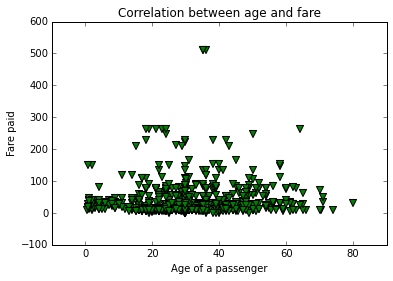

In [5]:
# В итоге ваш график должен получиться примерно таким:

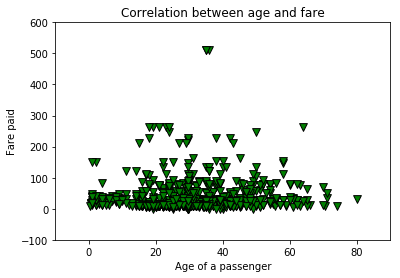

In [167]:
plt.ylim(-100, 600)
plt.xlim(-10 ,90)
plt.xlabel('Age of a passenger')
plt.ylabel('Fare paid') 
plt.title('Correlation between age and fare') 
plt.scatter(df.Age, df.Fare, s = 60, color='Green', marker='v', edgecolor = 'Black')

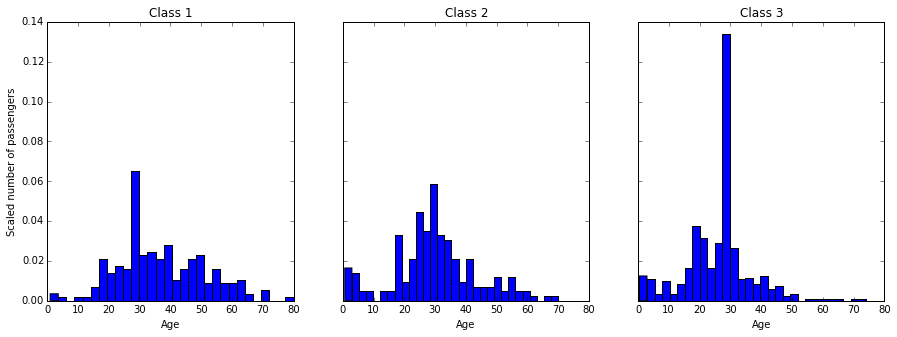

In [6]:
# В итоге ваш график должен получиться примерно таким:

Text(0.5,1,'Class 3')

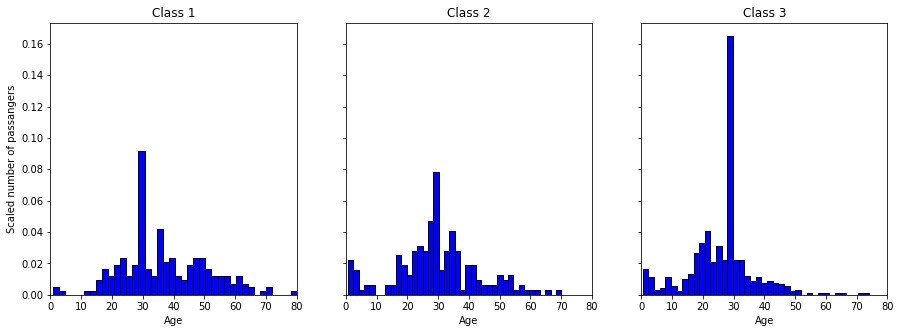

In [157]:
bins = 40
fig, axis = plt.subplots(1,3, figsize = (15,5), sharey=True, sharex=True)
axis[0].hist(df[df['Pclass'] == 1]['Age'].dropna(),
             bins=bins,  normed = True, color = 'Blue', edgecolor = 'Black')
axis[0].set_xlabel('Age')
axis[0].set_ylabel('Scaled number of passangers')
axis[0].set_title('Class 1')
axis[0].set_xlim(0,80)

axis[1].hist(df[df['Pclass'] == 2]['Age'].dropna(),
             bins=bins,  normed = True, color = 'Blue', edgecolor = 'Black')
axis[1].set_xlabel('Age')
axis[1].set_title('Class 2')
                 
axis[2].hist(df[df['Pclass'] == 3]['Age'].dropna(),
             bins=bins,  normed = True, color = 'Blue', edgecolor = 'Black')
axis[2].set_xlabel('Age')
axis[2].set_title('Class 3')

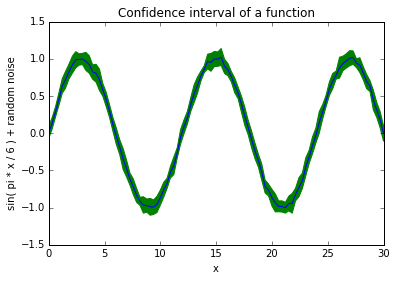

In [7]:
# В итоге ваш график должен получиться примерно таким:

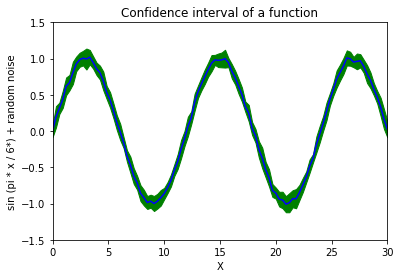

In [166]:
 def gen_uncertain_data():
            x = np.linspace(0, 30, 100)
            y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
            error = np.random.normal(0.1, 0.02, size=y.shape)
            return x, y, error
x, y, er = gen_uncertain_data()
plt.xlim(0,30)
plt.ylim(-1.5, 1.5)
plt.xlabel('X')
plt.ylabel('sin (pi * x / 6*) + random noise') 
plt.title('Confidence interval of a function') 
plt.plot(x,y, color = 'blue') 
plt.fill_between(x, y-er, y+er, color='Green') 